In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
df.shape

(267, 9)

In [6]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [7]:
#giving proper column name
df.columns =['States','Date','Frequency','Estimated Unployment Rate','Estimated Employment','Estimated Labour Participation Rate','Region','Longitude','Latitude']

In [8]:
#updated dataframe
df.head()

,States,Date,Frequency,Estimated Unployment Rate,Estimated Employment,Estimated Labour Participation Rate,Region,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [9]:
#checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unployment Rate            267 non-null    float64
 4   Estimated Employment                 267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   Longitude                            267 non-null    float64
 8   Latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [10]:
# converting date column to datetime
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [11]:
#converting 'Frequency'column from object to category
df['Frequency'] = df['Frequency'].astype('category')

In [12]:
#converting 'Regio'n column from oblect to category
df['Region'] = df['Region'].astype('category')

In [13]:
# for future ploting purpose i may need month column
## Extracting month from 'Date' and creating a 'Month' column
df['Month'] = df['Date'].dt.month

In [14]:
#to be more specific in month column
# Mapping integer month values to abbreviated month names
df['Month_name'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [15]:
df.head()

,States,Date,Frequency,Estimated Unployment Rate,Estimated Employment,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [16]:
#dropping the Month column as it in irrelevant now
#we have extracted the monthNumbers and monthNames individually
df.drop(columns='Month',inplace=True)
df.head(3)

,States,Date,Frequency,Estimated Unployment Rate,Estimated Employment,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,Mar


In [17]:
df.Month_name.unique()   # we have a data from January to October

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct'], dtype=object)

**Exploratory Data Analysi**s

In [18]:
#first i would like to know which Region & states are affected
region_affected = df.groupby(['Region'])[['Estimated Unployment Rate','Estimated Employment','Estimated Labour Participation Rate']].mean().reset_index()
#rounding the decimal value up to 2
print(round(region_affected,2))

      Region  Estimated Unployment Rate  Estimated Employment  \
0       East                      13.92           19602366.90   
1      North                      15.89           13072487.92   
2  Northeast                      10.95            3617105.53   
3      South                      10.45           14040589.33   
4       West                       8.24           18623512.72   

   Estimated Labour Participation Rate  
0                                40.11  
1                                38.70  
2                                52.06  
3                                40.44  
4                                41.26  


In [19]:
# this summary gives us exact idea of unployment
# 5-number summary of the numerical variables which give some information
round(df[['Estimated Unployment Rate','Estimated Employment','Estimated Labour Participation Rate']].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employment,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


**Top 10 states with Estimated Unemployment Rate quaterly wise**

In [20]:
#setting colour for plot
plt.style.use('dark_background')


In [21]:
plot_unployment = df[['Estimated Unployment Rate','States']]
df_unemployed = plot_unployment.groupby('States').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unployment Rate')

fig =px.bar(df_unemployed,x='States',y='Estimated Unployment Rate',color ='States',title = 'Average unployment rate in each state')

fig.show()

**Conclusion:**Tripura and Haryana has highest unemployment rate.

**Looking unemployment quarterly in detail**

**1.Looking in Month January **

In [23]:
df_jan =df[df['Month_name']=='Jan'].sort_values(by='Estimated Unployment Rate',ascending = False).reset_index()
df_jan.head()

,index,States,Date,Frequency,Estimated Unployment Rate,Estimated Employment,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_name
0,227,Tripura,2020-01-31,M,32.67,1508130,69.69,Northeast,23.9408,91.9882,Jan
1,40,Delhi,2020-01-31,M,22.23,5805284,47.79,North,28.7041,77.1025,Jan
2,90,Jammu & Kashmir,2020-01-31,M,21.08,3453025,42.20,North,33.7782,76.5762,Jan
3,70,Haryana,2020-01-31,M,20.34,7693231,43.36,North,29.0588,76.0856,Jan
4,80,Himachal Pradesh,2020-01-31,M,16.83,2287632,45.50,North,31.1048,77.1734,Jan


Text(0.5, 1.0, 'Top 10 States Unemployment in Month Jan ')

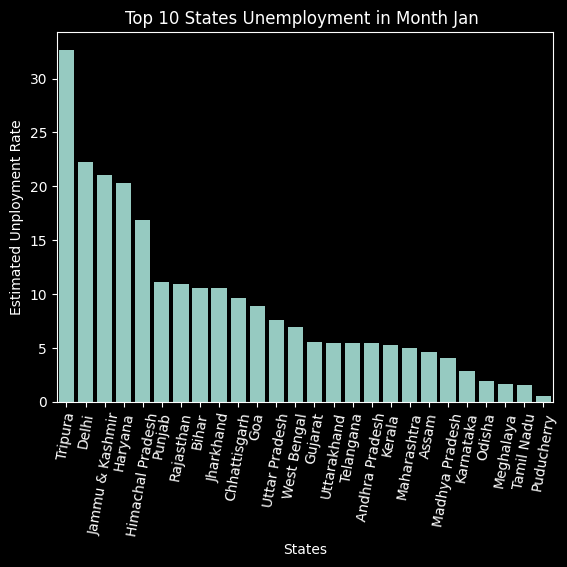

In [24]:
#plotting above table with graph
sns.barplot(x=df_jan['States'],y=df_jan['Estimated Unployment Rate'])
plt.xticks(rotation=80) # this is for name of the states
plt.title('Top 10 States Unemployment in Month Jan ')



**Conclusion: ** For January month most affected states are Tripura and Delhi.

**2.Looking into month April**

In [26]:
df_apr = df[df['Month_name']=='Apr'].sort_values(by = 'Estimated Unployment Rate',ascending =False).reset_index()
df_apr.head()

,index,States,Date,Frequency,Estimated Unployment Rate,Estimated Employment,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_name
0,172,Puducherry,2020-04-30,M,75.85,117542,39.30,South,11.9416,79.8083,Apr
1,210,Tamil Nadu,2020-04-30,M,49.83,9719167,29.63,South,11.1271,78.6569,Apr
2,102,Jharkhand,2020-04-30,M,47.09,5335262,37.69,East,23.6102,85.2799,Apr
3,23,Bihar,2020-04-30,M,46.64,16046236,38.17,East,25.0961,85.3131,Apr
4,73,Haryana,2020-04-30,M,43.22,5647630,44.38,North,29.0588,76.0856,Apr


Text(0.5, 1.0, 'Top 10 States Unemployment in Month April')

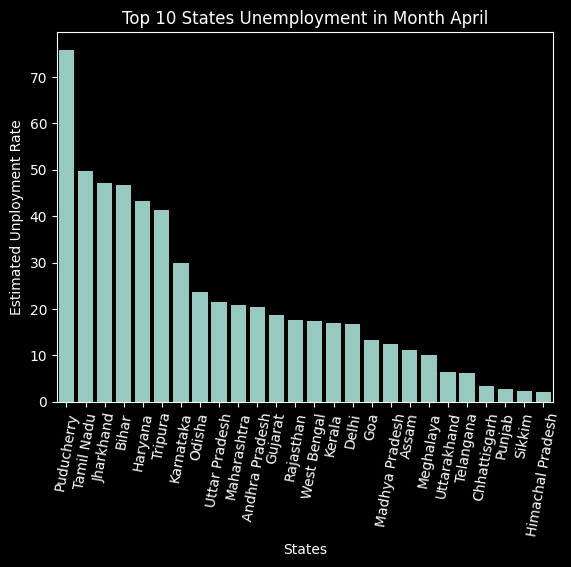

In [27]:
# plot for april month
sns.barplot(x = df_apr['States'],y=df_apr['Estimated Unployment Rate'])
plt.xticks(rotation = 80)
plt.title('Top 10 States Unemployment in Month April')

**Conclusion:** For April month Unemployment rate drastically increased and Puducherry & Tamilnadu are most affected.

**3. Looking into Month August**

In [28]:
df_aug = df[df['Month_name']=='Aug'].sort_values(by = 'Estimated Unployment Rate',ascending = False).reset_index()
df_aug.head()

,index,States,Date,Frequency,Estimated Unployment Rate,Estimated Employment,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_name
0,77,Haryana,2020-08-31,M,33.50,7113788,47.32,North,29.0588,76.0856,Aug
1,234,Tripura,2020-08-31,M,27.92,1318621,56.21,Northeast,23.9408,91.9882,Aug
2,196,Rajasthan,2020-08-31,M,17.51,20014060,41.71,North,27.0238,74.2179,Aug
3,57,Goa,2020-08-31,M,16.21,473016,43.76,West,15.2993,74.1240,Aug
4,87,Himachal Pradesh,2020-08-31,M,15.79,2029740,39.42,North,31.1048,77.1734,Aug


Text(0.5, 1.0, 'Top 10 States Unemployment in Month August')

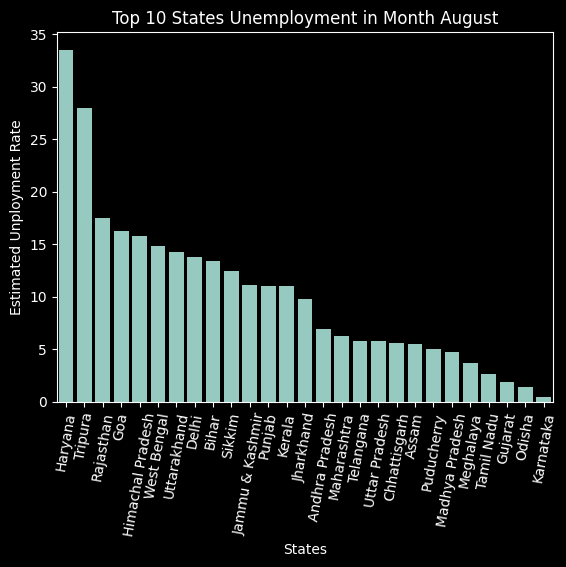

In [29]:
#graphicaly presentation of month august
# plot for August month
sns.barplot(x = df_aug['States'],y=df_aug['Estimated Unployment Rate'])
plt.xticks(rotation = 80)
plt.title('Top 10 States Unemployment in Month August')

**Conclusion:** From above graph it is clear that Estimated Unemployment Rate is now decrease from nearly 75 to 34 and affected states are Harayana and Tripura.

**4.Looking into Month October**

In [31]:
df_oct = df[df['Month_name']=='Oct'].sort_values(by= 'Estimated Unployment Rate',ascending = False).reset_index()
df_aug.head()

,index,States,Date,Frequency,Estimated Unployment Rate,Estimated Employment,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_name
0,77,Haryana,2020-08-31,M,33.50,7113788,47.32,North,29.0588,76.0856,Aug
1,234,Tripura,2020-08-31,M,27.92,1318621,56.21,Northeast,23.9408,91.9882,Aug
2,196,Rajasthan,2020-08-31,M,17.51,20014060,41.71,North,27.0238,74.2179,Aug
3,57,Goa,2020-08-31,M,16.21,473016,43.76,West,15.2993,74.1240,Aug
4,87,Himachal Pradesh,2020-08-31,M,15.79,2029740,39.42,North,31.1048,77.1734,Aug


Text(0.5, 1.0, 'Top 10 States Unemployment in Month October')

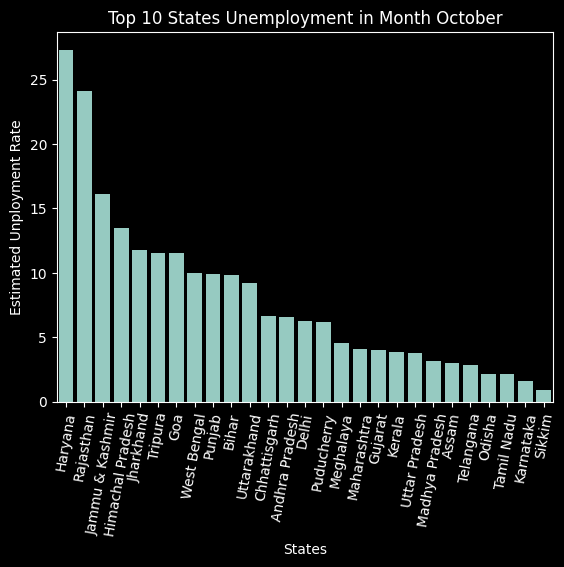

In [32]:
#plt for oct
sns.barplot (x= df_oct['States'],y=df_oct['Estimated Unployment Rate'])
plt.xticks(rotation = 80)
plt.title('Top 10 States Unemployment in Month October')

**Conclusion :** From above graph it is clear that Estimated Unemployment Rate decreased and now states affected are Haryana and Rajasthan.

**Looking into States Estimated Unemployment Rate according to Month wise**


In [37]:
#writting function
def plot(df,States):
    # Select the relevant columns explicitly
    subset = df[df['States']== States][['Month_name', 'Estimated Unployment Rate']]
    sns.barplot(x= subset['Month_name'],y=subset['Estimated Unployment Rate'])
    plt.title(f'{States}')

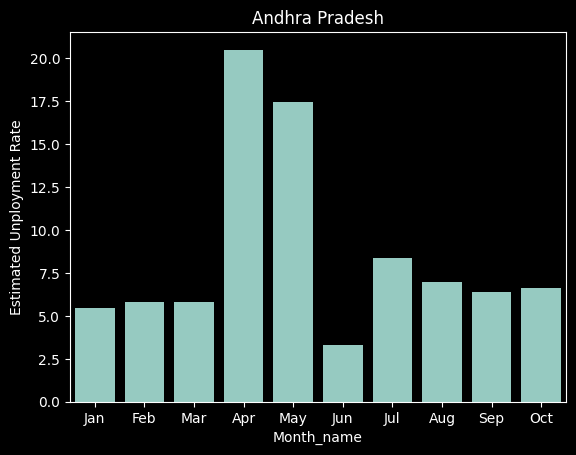

In [38]:
plot(df,'Andhra Pradesh')


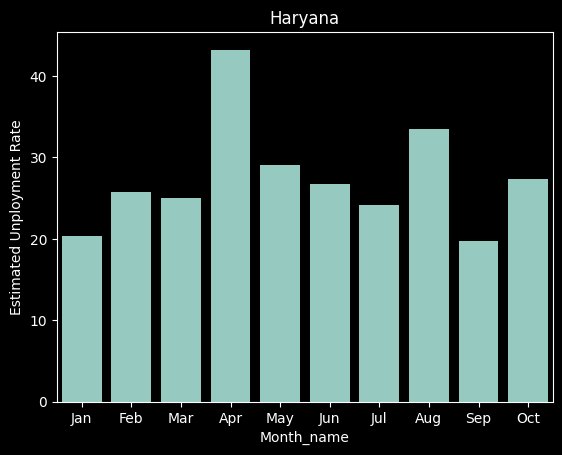

In [40]:
plot(df,'Haryana')

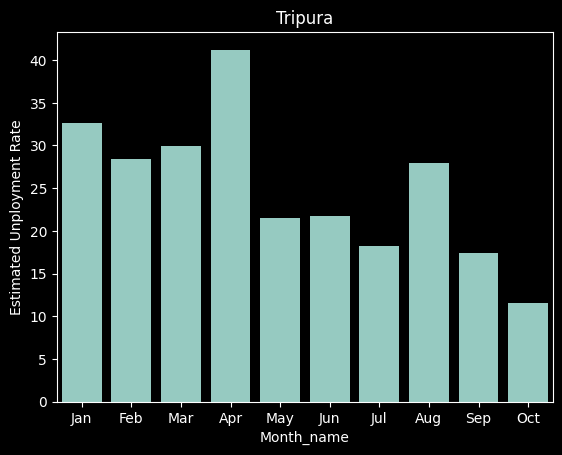

In [41]:
plot(df,'Tripura')

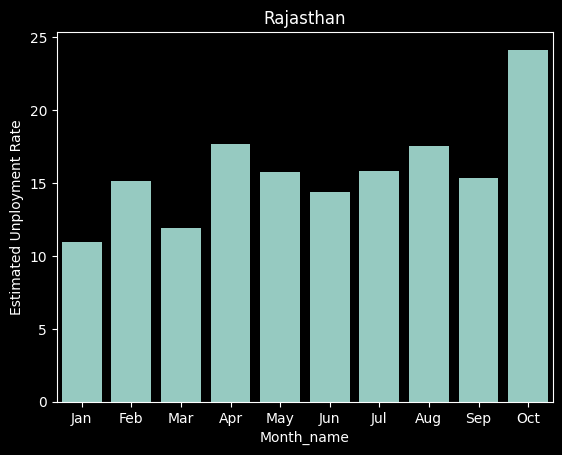

In [42]:
plot(df,'Rajasthan')

**Sunburst chart showing unemployment rate in easch region and State**

In [56]:
#creating a df
unemployment_df = df[['States','Region','Estimated Unployment Rate','Estimated Employment','Estimated Labour Participation Rate']]

unemployment = unemployment_df.groupby(['Region','States'])['Estimated Unployment Rate'].mean().reset_index()

In [57]:
unemployment_df.head()

,States,Region,Estimated Unployment Rate,Estimated Employment,Estimated Labour Participation Rate
0,Andhra Pradesh,South,5.48,16635535,41.02
1,Andhra Pradesh,South,5.83,16545652,40.90
2,Andhra Pradesh,South,5.79,15881197,39.18
3,Andhra Pradesh,South,20.51,11336911,33.10
4,Andhra Pradesh,South,17.43,12988845,36.46


In [58]:
unemployment.head()

,Region,States,Estimated Unployment Rate
0,East,Andhra Pradesh,NaN
1,East,Assam,NaN
2,East,Bihar,19.471
3,East,Chhattisgarh,NaN
4,East,Delhi,NaN


In [61]:
#now preparing sunburst chart
fig = px.sunburst(unemployment, path=['Region', 'States'], values='Estimated Unployment Rate', color_continuous_scale='total_bill',
                  title='Unemployment Rate in each Region and State', height=600, template='presentation')
fig.show()

**Impact of Lockdown**

In [79]:
fig = px.scatter_geo(df,'Longitude','Latitude',color = 'Region',
                      hover_name = 'States', size = 'Estimated Unployment Rate',
                     animation_frame ='Month_name',scope = 'asia', template = 'seaborn',title = 'Impact of Lockdown on Employment')
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 3000



fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#3399FF",
    showocean=True)

fig.show()

